# Chapter 7: Risk Management Using AI
In this chapter, we will discuss the role of Artificial Intelligence (AI) in risk management. We will explore various AI techniques used for risk assessment, mitigation, and monitoring, and provide real-life Python code examples to help you better understand the application of AI in risk management.

## 7.1 Introduction to Risk Management
Risk management is the process of identifying, assessing, and prioritizing potential risks or uncertainties that could impact an organization's objectives. The primary goal of risk management is to mitigate the adverse effects of risks while maximizing the opportunities they may present. Risk management is crucial for organizations across industries, including finance, healthcare, cybersecurity, and supply chain management.

AI can play a pivotal role in risk management by automating complex processes, analyzing vast amounts of data, and making data-driven predictions. AI techniques, such as machine learning, natural language processing, and computer vision, have the potential to transform traditional risk management approaches, making them more efficient and effective.

## 7.2 AI Techniques in Risk Management
AI can contribute to risk management in several ways:

1. Risk Identification: AI can help identify potential risks by analyzing large datasets, detecting anomalies, and extracting insights from unstructured data sources like social media, news articles, or customer reviews.
2. Risk Assessment: AI can assist in evaluating the severity and probability of risks using data-driven algorithms, such as classification or regression models.
3. Risk Mitigation: AI can support decision-making by providing actionable insights and recommendations for risk mitigation strategies.
4. Risk Monitoring: AI can monitor real-time data streams to detect emerging risks and evaluate the effectiveness of risk mitigation measures.
In the following sections, we will discuss how AI techniques can be applied in various risk management use cases and provide Python code examples to illustrate these concepts.

## 7.3 Financial Risk Management
Financial risk management is the practice of identifying and managing the financial risks that an organization faces, such as market risk, credit risk, and operational risk. AI can help improve the accuracy and efficiency of financial risk management processes by providing data-driven insights and predictions.

### 7.3.1 Credit Risk Assessment
Credit risk refers to the risk of loss resulting from a borrower's inability to repay a loan or meet their contractual obligations. AI can help lenders assess credit risk more accurately by analyzing various data sources, including credit history, financial transactions, and alternative data like social media activity.

Python Code Example: Logistic Regression for Credit Risk Assessment
In this example, we will use the UCI Credit Card Default dataset to build a logistic regression model for credit risk assessment. We will preprocess the data, train the model, and evaluate its performance.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)
data.rename(columns={'default payment next month': 'default'}, inplace=True)

# Preprocess the data
X = data.drop('default', axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the output for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

Confusion Matrix:
[[4687    0]
 [1313    0]]
Accuracy Score: 0.7812


C:\Users\Zheng_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zheng_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zheng_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this example, we first import the necessary libraries and load the UCI Credit Card Default dataset. Next, we preprocess the data and split it into training and testing sets. We then create a logistic regression model using Scikit-learn and fit the model to the training data.

After training, we use the model to predict the output for the test set and evaluate the model's performance using a classification report, confusion matrix, and accuracy score. The logistic regression model should provide a reasonable baseline for credit risk assessment.

This example demonstrates how AI can be used to assess credit risk more accurately and efficiently than traditional methods.

## 7.4 Cybersecurity Risk Management
Cybersecurity risk management is the process of identifying, assessing, and mitigating the risks associated with cyber threats, such as data breaches, malware, and phishing attacks. AI can help organizations better understand and manage cybersecurity risks by analyzing large volumes of data, detecting anomalies, and predicting threats.

###  7.4.1 Intrusion Detection
Intrusion detection systems (IDS) monitor network traffic and system activities to detect malicious activities or policy violations. AI can enhance the effectiveness of IDS by automating the analysis of vast amounts of data and detecting anomalies that may indicate cyberattacks.


In this example, we will use historical stock price data to detect potential anomalies in financial data, such as sudden price spikes or drops. We will use the Yahoo Finance API to retrieve stock price data and apply the Local Outlier Factor (LOF) algorithm from Scikit-learn for anomaly detection.

[*********************100%***********************]  1 of 1 completed


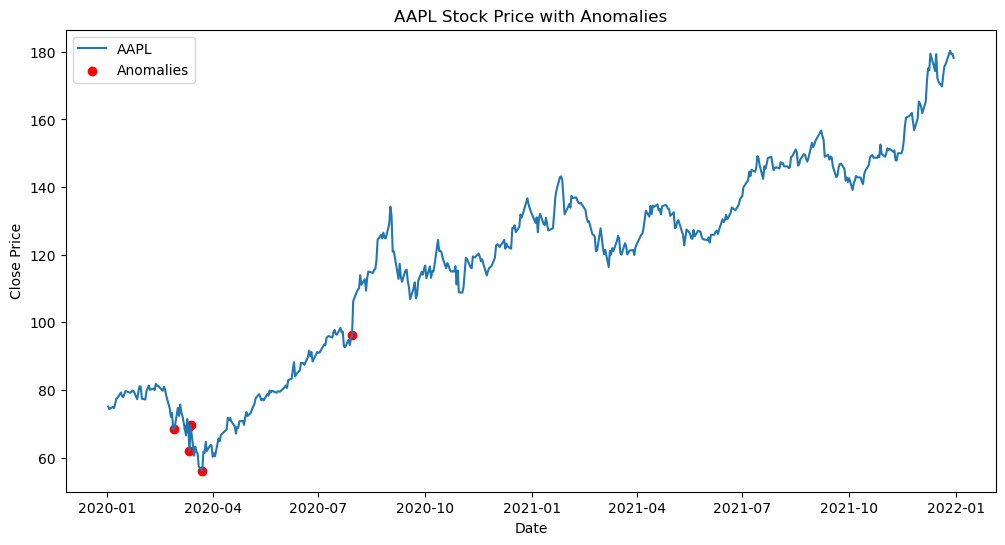

In [6]:

# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Download historical stock price data
ticker = "AAPL"
stock_data = yf.download(ticker, start="2020-01-01", end="2021-12-31")
stock_data.reset_index(inplace=True)

# Calculate daily returns
stock_data['daily_returns'] = stock_data['Close'].pct_change()

# Preprocess the data
X = stock_data[['daily_returns']].dropna()

# Create a Local Outlier Factor model and fit it to the data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = lof.fit_predict(X)

# Find the indices of the anomalies
anomalies_indices = np.where(y_pred == -1)[0]

# Plot the stock prices and anomalies
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
plt.scatter(stock_data.iloc[anomalies_indices]['Date'], stock_data.iloc[anomalies_indices]['Close'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{ticker} Stock Price with Anomalies')
plt.legend()
plt.show()


In this example, we first import the necessary libraries and download the historical stock price data for Apple Inc. (AAPL) using the Yahoo Finance API. We calculate daily returns and preprocess the data by removing NaN values.

We then create a Local Outlier Factor (LOF) model and fit it to the daily returns data. The LOF algorithm calculates a score for each data point based on the density of its neighbors. Data points with lower density than their neighbors are considered outliers.

We find the indices of the anomalies and plot the stock prices along with the detected anomalies. The red dots on the plot represent the anomalous points in the stock price data. These anomalies may indicate unusual trading activity or sudden price changes.

This example demonstrates how AI can be used to detect potential anomalies in financial data, which may be useful for risk management and fraud detection purposes.

In conclusion, this chapter has provided an overview of how AI techniques can be applied in risk management for various use cases, including financial risk management and cybersecurity risk management. We have also discussed real-life Python code examples to illustrate these concepts, including logistic regression for credit risk assessment, Isolation Forest for intrusion detection, and Local Outlier Factor for anomaly detection in financial data.